#### Задача 1
В массиве ethanol содержится информация об эксперименте по сжиганию этанола в двигателе.
Требуется предсказать количества оксида и диоксида азота в зависимости от параметров двигателя:
compression и equivalence. Построить графики остатков и диагностировать модель.

In [ ]:
with open('Ethanol.txt') as f:
    f.readline()
    lines = [line.strip().split() for line in f]
NOx, Compression, Equivalence,x= [], [], [],[]
for line in lines:
    NOx.append(float(line[0]))
    Compression.append(float(line[1]))
    Equivalence.append(float(line[2]))
    x.append([float(line[1]), float(line[2]), float(line[2])**2, float(line[2])**3, float(line[2])**4, float(line[2])**5])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

0.0015772153452811776


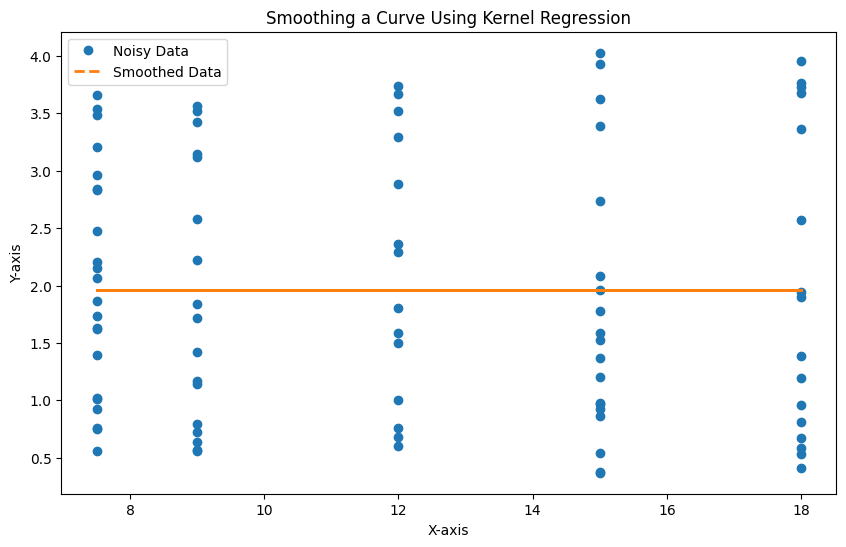

In [ ]:
kernel_regression = sm.nonparametric.KernelReg(
    NOx, Compression, var_type="c", reg_type="lc", bw="cv_ls"
)
smoothed_data, _ = kernel_regression.fit()
print(kernel_regression.r_squared())

plt.figure(figsize=(10, 6))
plt.plot(Compression, NOx, "o", label="Noisy Data")
plt.plot(Compression, smoothed_data, label="Smoothed Data", linestyle="--", linewidth=2)
plt.legend()
plt.title("Smoothing a Curve Using Kernel Regression")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

0.0009691346354433064


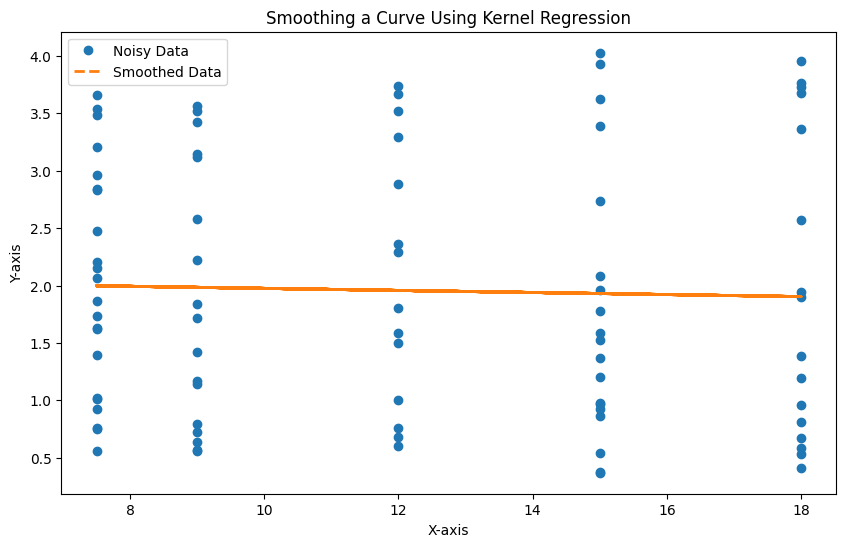

In [ ]:
kernel_regression = sm.nonparametric.KernelReg(
    NOx, Compression, var_type="c", reg_type="ll", bw="cv_ls"
)
smoothed_data, _ = kernel_regression.fit()
print(kernel_regression.r_squared())

plt.figure(figsize=(10, 6))
plt.plot(Compression, NOx, "o", label="Noisy Data")
plt.plot(Compression, smoothed_data, label="Smoothed Data", linestyle="--", linewidth=2)
plt.legend()
plt.title("Smoothing a Curve Using Kernel Regression")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [ ]:
x= sm.add_constant(x)

In [ ]:
model = sm.OLS(NOx, x)
results = model.fit()
print(len(x), len(NOx))
print(results.summary())

88 88
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     205.3
Date:                Fri, 31 May 2024   Prob (F-statistic):           7.98e-47
Time:                        12:45:08   Log-Likelihood:                -12.778
No. Observations:                  88   AIC:                             39.56
Df Residuals:                      81   BIC:                             56.90
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.2268     70.706     -0.555   

Построим графики зависимости остатков от признаков.

Это график для модели, где член Equivalence входит до 5-й степени.

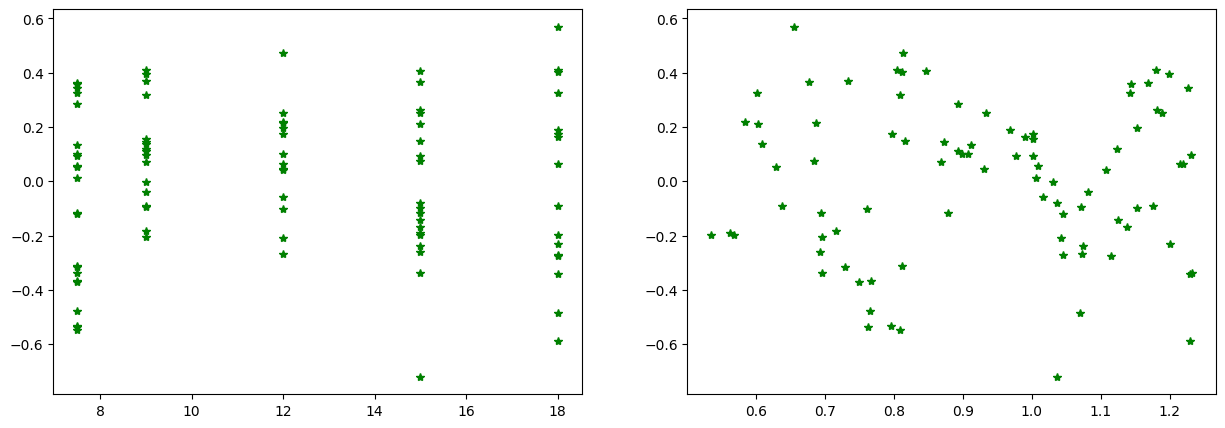

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
ax1.plot(Compression, np.array(NOx)-np.array((-39.2268)*np.array(x)[:,0] + 0.0540*np.array(x)[:,1] + 391.7518*np.array(x)[:,2] + (-1373.5800)*np.array(x)[:,3] + (2175.1283)*np.array(x)[:,4] + (-1576.5137)*np.array(x)[:,5] + (424.9302)*np.array(x)[:,6]), "*g")
ax2.plot(Equivalence, np.array(NOx)-np.array((-39.2268)*np.array(x)[:,0] + 0.0540*np.array(x)[:,1] + 391.7518*np.array(x)[:,2] + (-1373.5800)*np.array(x)[:,3] + (2175.1283)*np.array(x)[:,4] + (-1576.5137)*np.array(x)[:,5] + (424.9302)*np.array(x)[:,6]), "*g")

Это график для модели, где член Equivalence входит до 4-й степени.

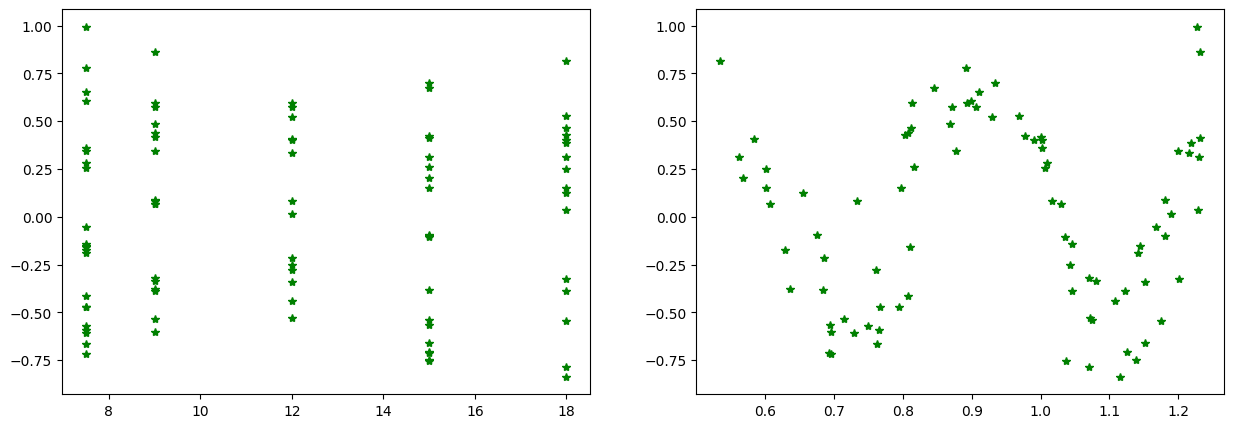

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
ax1.plot(Compression, np.array(NOx)-np.array((-19.2560)*np.array(x)[:,0] + 0.0628*np.array(x)[:,1] + 45.5542*np.array(x)[:,2] + (-21.2716)*np.array(x)[:,3] + (-2.8823)*np.array(x)[:,4]), "*g")
ax2.plot(Equivalence, np.array(NOx)-np.array((-19.2560)*np.array(x)[:,0] + 0.0628*np.array(x)[:,1] + 45.5542*np.array(x)[:,2] + (-21.2716)*np.array(x)[:,3] + (-2.8823)*np.array(x)[:,4]), "*g")

Это график для модели, где член Equivalence входит до 2-й степени.

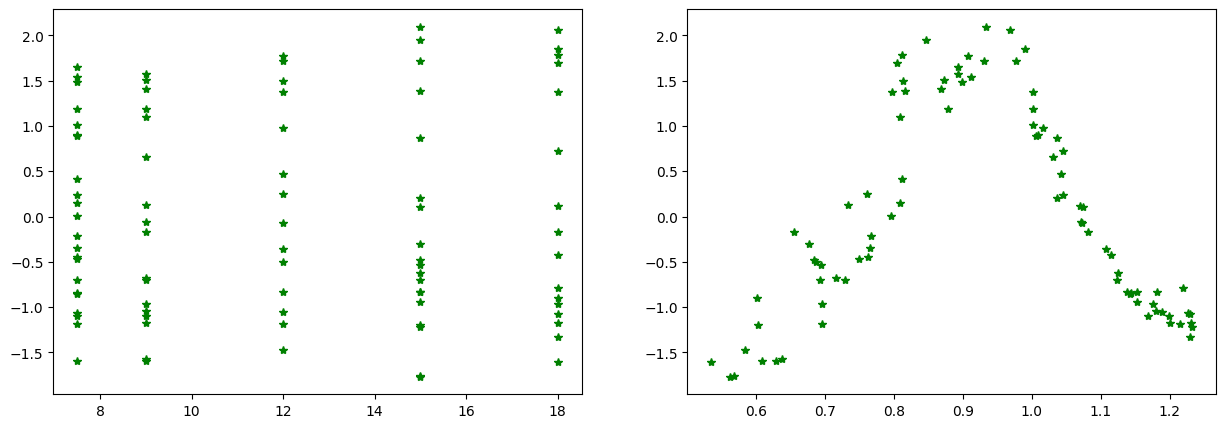

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
ax1.plot(Compression, np.array(NOx)-np.array(2.5591*np.array(x)[:,0] + (-0.0071)*np.array(x)[:,1] + (-0.5571)*np.array(x)[:,2]), "*g")
ax2.plot(Equivalence, np.array(NOx)-np.array(2.5591*np.array(x)[:,0] + (-0.0071)*np.array(x)[:,1] + (-0.5571)*np.array(x)[:,2]), "*g")

Это график для модели, где член Equivalence входит до 3-й степени.

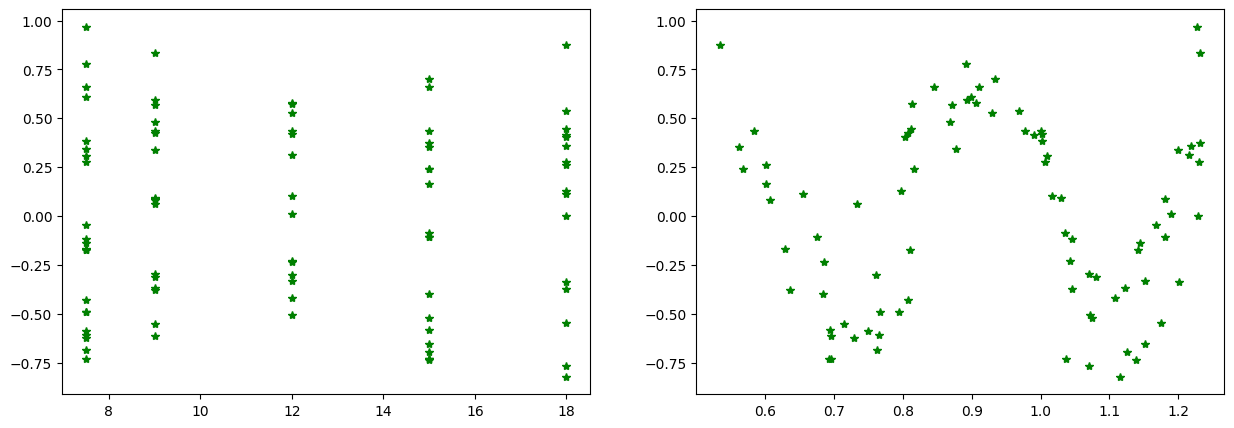

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
ax1.plot(Compression, np.array(NOx)-np.array((-21.2030)*np.array(x)[:,0] + 0.0635*np.array(x)[:,1] + 52.4110*np.array(x)[:,2] + (-29.0899)*np.array(x)[:,3]), "*g")
ax2.plot(Equivalence, np.array(NOx)-np.array((-21.2030)*np.array(x)[:,0] + 0.0635*np.array(x)[:,1] + 52.4110*np.array(x)[:,2] + (-29.0899)*np.array(x)[:,3]), "*g")

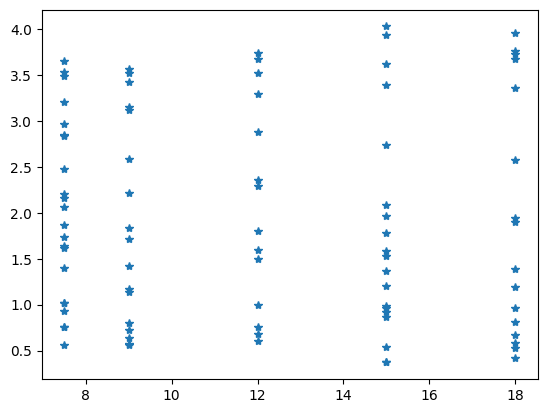

In [ ]:
plt.plot(Compression, NOx, "*")

Видим нелинейную зависимость NOx от Equivalence. Поэтому во всех моделях предпринимаются попытки приблизить зависимость полиномом.

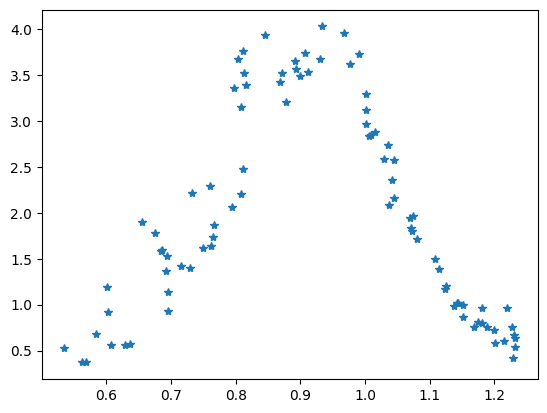

In [ ]:
plt.plot(Equivalence, NOx, "*")

#### Задача 2
В файле FERTIL3.raw приведены данные о рождаемости. Переменная gfr — число детей на 1000
женщин детородного возраста, pe — величина налогового вычета, ww2 — бинарная переменная,
показывающая годы Второй мировой войны, pill — бинарная переменная, показывающая появление
противозачаточных таблеток.Постройте модель
𝑔𝑓𝑟𝑡 = 𝛽0 + 𝛽1𝑝𝑒𝑡 + 𝛽2𝑤𝑤2𝑡 + 𝛽2𝑝𝑖𝑙𝑙𝑡.
Теперь постройте ту же модель, но добавьте лаги 1 и 2 по переменной 𝑝𝑒𝑡. Попробуйте добавить
лаги 𝑝𝑒𝑡−3 и 𝑝𝑒𝑡−4. Детрендируйте переменную 𝑔𝑓𝑟𝑡 (попробуйте линейный и квадратичный тренд),
постройте модель на детрендированную переменную. Попробуйте самостоятельно добавить те или
иные переменные. Какая модель оказалась лучшей (ориентируйтесь на 𝑅2
𝑎𝑑𝑗 , 𝐴𝐼𝐶 и значимость
коэффициентов)? Проведите анализ остатков полученной модели (нормальность, гомоскедастич-
ность, неавтокоррелированность).

In [ ]:
import pandas as pd
df = pd.read_csv('FERTIL3.raw', sep='\s+', index_col = False, header=None)
df.head(3)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_5660\757140897.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('FERTIL3.raw', sep='\s+', index_col = False, header=None)
C:\Users\USER\AppData\Local\Temp\ipykernel_5660\757140897.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,124.7,0.0,1913,1,1,.,.,.,.,0,...,.,.,.,.,.,.,.,.,.,.
1,126.6,0.0,1914,2,4,0,.,.,.,0,...,.,.,.,.,124.7,.,.,.,.,.
2,125.0,0.0,1915,3,9,0,0,.,.,0,...,0,.,.,.,126.6,1.900002,.,.,.,124.7


In [ ]:
columns_list = ["gfr", "pe", "year", "t", "tsq", "pe_1", "pe_2", "pe_3", "pe_4", "pill", "ww2", "tcu", "cgfr", "cpe", "cpe_1", "cpe_2", "cpe_3", "cpe_4", "gfr_1", "cgfr_1", "cgfr_2", "cgfr_3", "cgfr_4", "gfr_2"]

In [ ]:
df=df.set_axis(columns_list, axis=1)

In [ ]:
df

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
0,124.7,0.00,1913,1,1,.,.,.,.,0,...,.,.,.,.,.,.,.,.,.,.
1,126.6,0.00,1914,2,4,0,.,.,.,0,...,.,.,.,.,124.7,.,.,.,.,.
2,125.0,0.00,1915,3,9,0,0,.,.,0,...,0,.,.,.,126.6,1.900002,.,.,.,124.7
3,123.4,0.00,1916,4,16,0,0,0,.,0,...,0,0,.,.,125,-1.599998,1.900002,.,.,126.6
4,121.0,19.27,1917,5,25,0,0,0,0,0,...,0,0,0,.,123.4,-1.599998,-1.599998,1.900002,.,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68.4,123.17,1980,68,4624,132.93,118.98,116.11,120.08,1,...,13.94999,2.870003,-3.970001,-2.279999,67.2,1.699997,-1.300003,1,-.1999969,65.5
68,67.4,119.31,1981,69,4761,123.17,132.93,118.98,116.11,1,...,-9.759995,13.94999,2.870003,-3.970001,68.4,1.200005,1.699997,-1.300003,1,67.2
69,67.3,102.04,1982,70,4900,119.31,123.17,132.93,118.98,1,...,-3.860001,-9.759995,13.94999,2.870003,67.4,-1,1.200005,1.699997,-1.300003,68.4
70,65.8,92.49,1983,71,5041,102.04,119.31,123.17,132.93,1,...,-17.27,-3.860001,-9.759995,13.94999,67.3,-.0999985,-1,1.200005,1.699997,67.4


In [ ]:
import statsmodels.api as sm
import numpy as np

X = sm.add_constant(df[['pe', 'ww2', 'pill']])
y = df['gfr']

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     20.38
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.57e-09
Time:                        14:09:42   Log-Likelihood:                -293.56
No. Observations:                  72   AIC:                             595.1
Df Residuals:                      68   BIC:                             604.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.6818      3.208     30.760      0.0

In [ ]:
pe1=[df['pe'][i-1] for i in range(1, len(df['pe']))]
pe2=[df['pe'][i-2] for i in range(2, len(df['pe']))]
pe1.insert(0,0.0)
pe2.insert(0,0.0)
pe2.insert(0,0.0)
df['pe1']=pe1
df['pe2']=pe2

X = sm.add_constant(df[['pe', 'ww2', 'pill', 'pe1', 'pe2']])
y = df['gfr']

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     11.91
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           3.14e-08
Time:                        14:09:51   Log-Likelihood:                -293.49
No. Observations:                  72   AIC:                             599.0
Df Residuals:                      66   BIC:                             612.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.7195      3.257     30.308      0.0

In [ ]:
pe3=[df['pe'][i-3] for i in range(3, len(df['pe']))]
pe4=[df['pe'][i-4] for i in range(4, len(df['pe']))]
for i in range(3):
    pe3.insert(0,0.0)
for i in range(4):
    pe4.insert(0,0.0)

df['pe3']=pe3
df['pe4']=pe4

X = sm.add_constant(df[['pe', 'ww2', 'pill', 'pe1', 'pe2', 'pe3', 'pe4']])
y = df['gfr']

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     8.274
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           3.72e-07
Time:                        14:10:08   Log-Likelihood:                -293.45
No. Observations:                  72   AIC:                             602.9
Df Residuals:                      64   BIC:                             621.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.7072      3.306     29.857      0.0

In [ ]:
import statsmodels.api as sm
import numpy as np

df['t'] = range(1, len(df) + 1)
df['t2'] = [i**2 for i in range(1, len(df) + 1)]


y = df['gfr']
X = sm.add_constant(df['t'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['gfr_detrended'] = resid

y = df['gfr_detrended']
X = sm.add_constant(df['t2'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['gfr_detrended2'] = resid


X_detrended = sm.add_constant(df[['pe', 'ww2', 'pill', 't', 't2']])
y_detrended = df['gfr_detrended2']


model = sm.OLS(y_detrended, X_detrended)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         gfr_detrended2   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     21.03
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.64e-12
Time:                        15:08:19   Log-Likelihood:                -269.95
No. Observations:                  72   AIC:                             551.9
Df Residuals:                      66   BIC:                             565.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0153      4.361      2.067      0.0

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.5143685597710367

In [ ]:
import statsmodels.api as sm
import numpy as np

df['t'] = range(1, len(df) + 1)

y = df['pe']
X = sm.add_constant(df['t'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe_detrended'] = resid


y = df['ww2']
X = sm.add_constant(df['t'])
ww2_model = sm.OLS(y, X)
resid = ww2_model.fit().resid
df['ww2_detrended'] = resid


y = df['pill']
X = sm.add_constant(df['t'])
pill_model = sm.OLS(y, X)
resid = pill_model.fit().resid
df['pill_detrended'] = resid



X_detrended = sm.add_constant(df[['pe_detrended', 'ww2_detrended', 'pill_detrended', 't']])
y_detrended = df['gfr']


model = sm.OLS(y_detrended, X_detrended)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     32.84
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           3.76e-15
Time:                        14:30:10   Log-Likelihood:                -277.57
No. Observations:                  72   AIC:                             565.1
Df Residuals:                      67   BIC:                             576.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            114.2221      2.822     40.

In [ ]:
import statsmodels.api as sm
import numpy as np

df['t2'] = [i**2 for i in range(1, len(df) + 1)]

y = df['pe_detrended']
X = sm.add_constant(df['t2'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe_detrended2'] = resid


y = df['ww2_detrended']
X = sm.add_constant(df['t2'])
ww2_model = sm.OLS(y, X)
resid = ww2_model.fit().resid
df['ww2_detrended2'] = resid


y = df['pill_detrended']
X = sm.add_constant(df['t2'])
pill_model = sm.OLS(y, X)
resid = pill_model.fit().resid
df['pill_detrended2'] = resid



X_detrended = sm.add_constant(df[['pe_detrended2', 'ww2_detrended2', 'pill_detrended2', 't', 't2']])
y_detrended = df['gfr']


model = sm.OLS(y_detrended, X_detrended)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     35.09
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.44e-17
Time:                        14:34:40   Log-Likelihood:                -269.95
No. Observations:                  72   AIC:                             551.9
Df Residuals:                      66   BIC:                             565.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             134.8403      5.425     

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.5143685597710927

In [ ]:
X_detrended = sm.add_constant(df[['pe_detrended2', 'ww2_detrended2', 't', 't2']])
y_detrended = df['gfr']


model = sm.OLS(y_detrended, X_detrended)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     42.25
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.20e-17
Time:                        14:54:31   Log-Likelihood:                -271.32
No. Observations:                  72   AIC:                             552.6
Df Residuals:                      67   BIC:                             564.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            131.2823      5.004     26.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.5189656467574959

In [ ]:
import statsmodels.api as sm
import numpy as np

df['t'] = range(1, len(df) + 1)

y = df['pe1']
X = sm.add_constant(df['t'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe1_detrended'] = resid


y = df['pe2']
X = sm.add_constant(df['t'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe2_detrended'] = resid


y = df['pe3']
X = sm.add_constant(df['t'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe3_detrended'] = resid


y = df['pe4']
X = sm.add_constant(df['t'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe4_detrended'] = resid


X_detrended = sm.add_constant(df[['pe_detrended', 'ww2_detrended', 'pill_detrended', 'pe1_detrended','pe2_detrended', 'pe3_detrended', 'pe4_detrended', 't']])
y_detrended = df['gfr']


model = sm.OLS(y_detrended, X_detrended)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     18.56
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           6.13e-14
Time:                        14:47:12   Log-Likelihood:                -273.05
No. Observations:                  72   AIC:                             564.1
Df Residuals:                      63   BIC:                             584.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            114.2221      2.733     41.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.26736574318120404

In [ ]:
import statsmodels.api as sm
import numpy as np

df['t2'] = [i**2 for i in range(1, len(df) + 1)]

y = df['pe1_detrended']
X = sm.add_constant(df['t2'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe1_detrended2'] = resid


y = df['pe2_detrended']
X = sm.add_constant(df['t2'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe2_detrended2'] = resid


y = df['pe3_detrended']
X = sm.add_constant(df['t2'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe3_detrended2'] = resid


y = df['pe4_detrended']
X = sm.add_constant(df['t2'])
pe_model = sm.OLS(y, X)
resid = pe_model.fit().resid
df['pe4_detrended2'] = resid



X_detrended = sm.add_constant(df[['pe_detrended2', 'ww2_detrended2', 'pill_detrended2', 'pe1_detrended2', 'pe2_detrended2', 'pe3_detrended2', 'pe4_detrended2','t', 't2']])
y_detrended = df['gfr']


model = sm.OLS(y_detrended, X_detrended)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     24.87
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           2.13e-17
Time:                        14:49:53   Log-Likelihood:                -261.63
No. Observations:                  72   AIC:                             543.3
Df Residuals:                      62   BIC:                             566.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             137.4723      5.034     

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.42554399495286344

In [ ]:
X_detrended = sm.add_constant(df[['pe_detrended2', 'ww2_detrended2', 'pill_detrended2', 'pe4_detrended2','t', 't2']])
y_detrended = df['gfr']


model = sm.OLS(y_detrended, X_detrended)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     38.50
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.43e-19
Time:                        14:56:58   Log-Likelihood:                -262.07
No. Observations:                  72   AIC:                             538.1
Df Residuals:                      65   BIC:                             554.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             137.3000      4.939     

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.4806850688631401

In [ ]:
X_detrended = sm.add_constant(df[['pe_detrended2', 'ww2_detrended2', 'pe4_detrended2','t', 't2']])
y_detrended = df['gfr']


model = sm.OLS(y_detrended, X_detrended)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     45.34
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           4.68e-20
Time:                        14:58:07   Log-Likelihood:                -263.02
No. Observations:                  72   AIC:                             538.0
Df Residuals:                      66   BIC:                             551.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            134.7425      4.571     29.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.48497899152756707

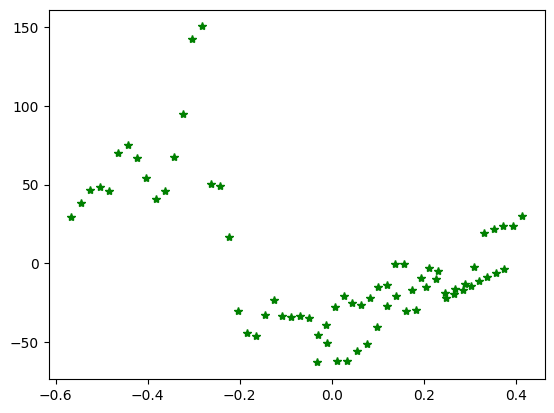

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['pill_detrended2'], y,'*g')

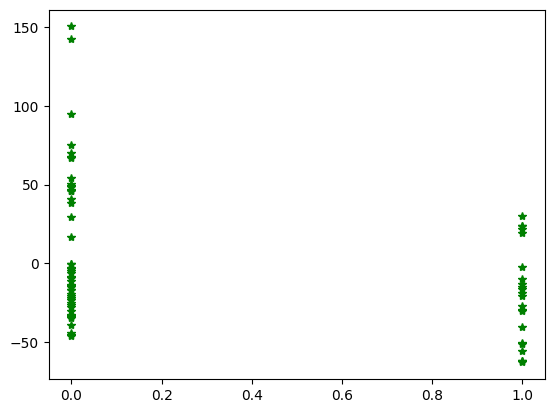

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['pill'], y,'*g')

In [ ]:
X_detrended = sm.add_constant(df[['pe', 'ww2', 'pill', 'pe1', 'pe2', 'pe3', 'pe4','t', 't2']])
y_detrended = df['gfr_detrended2']


model = sm.OLS(y_detrended, X_detrended)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         gfr_detrended2   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     15.62
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           6.11e-13
Time:                        15:10:42   Log-Likelihood:                -261.63
No. Observations:                  72   AIC:                             543.3
Df Residuals:                      62   BIC:                             566.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3211      4.151      3.209      0.0

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.42554399495237655